In [21]:
#app.py에서 corona 만든거 실행
import requests

In [22]:
url = "http://172.16.11.148:3000/corona" #ipconfig. 이건 강사님 IPv4 주소
params = {
    'servicekey': 'aaa'
}

requests.get(url, params=params).content

b'[{"Unnamed: 0":197,"accDefRate":2.7879081456,"accExamCnt":16878955.0,"createDt":"2021-11-23 08:59:47.863","deathCnt":3328,"decideCnt":420946,"seq":706,"stateDt":20211123,"stateTime":"00:00","updateDt":"2021-11-30 09:06:13.348"},{"Unnamed: 0":198,"accDefRate":2.7782488467,"accExamCnt":16816616.0,"createDt":"2021-11-22 09:07:45.615","deathCnt":3298,"decideCnt":418249,"seq":705,"stateDt":20211122,"stateTime":"00:00","updateDt":"2021-11-26 09:29:38.144"},{"Unnamed: 0":199,"accDefRate":2.7608226124,"accExamCnt":16777679.0,"createDt":"2021-11-21 09:05:22.138","deathCnt":3274,"decideCnt":415422,"seq":704,"stateDt":20211121,"stateTime":"00:00","updateDt":"2021-11-26 09:29:24.197"},{"Unnamed: 0":200,"accDefRate":2.7401775942,"accExamCnt":16740119.0,"createDt":"2021-11-20 08:51:26.319","deathCnt":3244,"decideCnt":412302,"seq":703,"stateDt":20211120,"stateTime":"00:00","updateDt":"2021-11-26 09:28:52.855"},{"Unnamed: 0":201,"accDefRate":2.7234260964,"accExamCnt":16684168.0,"createDt":"2021-11-1

다른 웹페이지 보기

In [23]:
url = "https://www.naver.com"
data = requests.get(url)

In [24]:
# import pprint as pp
# pp.pprint(data.content)

In [25]:
data = data.text

In [26]:
data.find("네이버")

365

In [27]:
data[365:368]

'네이버'

In [28]:
!pip install bs4

# beautifulsoup 라이브러리
1. html tag의 데이터를 쉽게 추출하기 위한 라이브러리
2. 웹의 구조를 어느정도 인지를 한 상태에서 라이브러리 사용하면
쉽게 데이터 추출
3. 파서를 활용하여 파이썬에서 접근이 쉽게 객체 형태로 제공


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
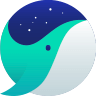
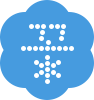

In [29]:
from bs4 import BeautifulSoup as bs
soup = bs(data, 'html.parser')
soup

- 태그의 이름을 사용해서 검색
    - soup[태그명]: 해당 태그의 첫번째 정보를 출력
    - soup[태그명][속성]: 해당 태그의 첫번째 속성에 대한 값을 출력

In [30]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)

<title>NAVER</title>
title
NAVER


In [31]:
print(soup.img)
print(soup.img['alt'])

<img alt="대한민국 임시정부 수립일" height="56" src="https://s.pstatic.net/static/www/mobile/edit/20230321/mobile_233108977255.png" width="225"/>
대한민국 임시정부 수립일


- find()
    - HTML 문서 안에서 해당 태그의 첫번째 정보 출력
    - find(속성 = 값): HTML 문서 안에서 해당 속성과 일치하는 값을 가진 태그의 첫번째
    정보를 출력

In [32]:
print(soup.find('a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


In [33]:
print(soup.find(id= "newsstand"))

<div class="sc_newscast" id="newsstand"> <h2 class="blind">뉴스스탠드</h2> <div class="group_issue" data-clk-prefix="ncy" id="NM_NEWSSTAND_HEADER"> <div class="issue_area"> <a class="link_media" data-clk="newsflash" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y">연합뉴스</a> <div class="list_issue" data-nm-ui="rolling" id="NM_ONELINE_ROLLING"> <div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013872414">강릉 산불 강풍에 해안가로 확산…산림당국 '대응 2단계' 상향</a></div>
<div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013872469">[속보] 한은 총재 "1분기 성장률 소폭 플러스 전환에 그칠 듯"</a></div>
<div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mi

- find_all()
    - HTML 문서 안에서 해당 태그에 대한 정보를 모두 출력(데이터형태가 list)
    - limit 매개변수: 리스트의 길이 지정

In [34]:
print(soup.find_all('span')[2])

<span>타임스퀘어 바로가기</span>


In [35]:
sample = soup.find('div', attrs={
    'class' : 'media_view'
}) 

In [36]:
print(sample) # 안나오면 다시 불러와 볼것

<div class="media_view">
<a class="media_area" data-clk="tcc_bty.video1cont1" data-gdid="e3a73e1c-82cf-40d9-b2c3-43c053d9ceb2" href="https://tv.naver.com/v/27521920" target="_blank">
<div class="media_thumb">
<img alt="" data-src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fshop.phinf%2F20220701_186%2F1656670379931AoN5V_JPEG%2F1655973442734.jpg%3Ftype%3Df342_264%22&amp;type=nf464_260" height="130" onerror="this.outerHTML='&lt;span class=\'pm_noimg\'&gt;&lt;span class=\'noimg_text\'&gt;이미지 준비중&lt;/span&gt;&lt;/span&gt;'" src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fshop.phinf%2F20220701_186%2F1656670379931AoN5V_JPEG%2F1655973442734.jpg%3Ftype%3Df342_264%22&amp;type=nf464_260" width="232"/>
<span class="thumb_dim"></span>
<span class="thumb_bd"></span>
<i class="pm_ico_play"><span class="blind">재생</span></i>
<span class="theme_runtime"><span class="runtime_bg">재생시간</span><em class="time">14:03</em></span>
</div>
<div class="me

In [37]:
sample_list = sample.find_all('strong')
print(sample_list)

[<strong class="title">핫한 신상 비교 분석 후기</strong>, <strong class="title">기존 TOP 제품보다 더 좋을까?</strong>, <strong class="title">디파가 추천하는 다이소 꿀템</strong>]


In [38]:
sample_list[0].get_text()

'핫한 신상 비교 분석 후기'

In [40]:
import pprint as pp

In [41]:
result = []

for i in sample_list:
    result.append(i.get_text())

pp.pprint(result)

['핫한 신상 비교 분석 후기', '기존 TOP 제품보다 더 좋을까?', '디파가 추천하는 다이소 꿀템']


In [ ]:
url = "https://finance.naver.com/"

html_data = requests.get(url).text

In [ ]:
soup = bs(html_data, 'html.parser')

In [ ]:
data = soup.find('table', attrs={
    'class' : 'tbl_home'
})

In [ ]:
data2 = data.find('tbody') #tbody 만 뽑기

In [ ]:
_list = data2.find_all('th') #여러개 뽑기

In [ ]:
result = []

for i in _list:
    result.append(i.get_text())

print(result)

['DB', '이트론', 'KODEX 200선물인버스2X', '크리스탈신소재', 'KODEX 코스닥150선물인버스', '엘컴텍', '이아이디', '동국산업', '유니온머티리얼', '엔에스엔', '포스코 ICT', '이스트아시아홀딩스', '디젠스', '제이스코홀딩스', '넥스턴바이오']


In [ ]:
data3 = data2.find_all('tr', attrs = {
    'class' : 'up'
})
data3[0]

<tr class="up">
<th scope="row"><a href="/item/main.naver?code=012030" onclick="clickcr(this, 'spe.slist', '012030', '1', event);">DB</a></th>
<td>2,840</td>
<td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 280</td>
<td> <em class="up"> +10.94% </em> </td>
</tr>

In [ ]:
#td 리스트 td가 3개씩 보임
_list3 = []

for i in data3:
    _list4 = i.find_all('td')
    _sample_list = []
    for j in _list4:
        _sample_list.append(j.get_text())
    _list3.append(_sample_list)

_list3


[['2,840', '상승 280', '  +10.94%  '],
 ['264', '상승 16', '  +6.45%  '],
 ['1,615', '상승 329', '  +25.58%  '],
 ['2,155', '상승 159', '  +7.97%  '],
 ['2,185', '상승 463', '  +26.89%  '],
 ['7,830', '상승 1,310', '  +20.09%  '],
 ['3,640', '상승 330', '  +9.97%  '],
 ['904', '상승 193', '  +27.14%  '],
 ['10,770', '상승 430', '  +4.16%  '],
 ['169', '상승 3', '  +1.81%  '],
 ['1,280', '상승 117', '  +10.06%  '],
 ['4,700', '상승 600', '  +14.63%  '],
 ['2,180', '상승 207', '  +10.49%  ']]

In [ ]:
#th 리스트
_list3 = []

for i in data3:
    _sample_list = []
    _sample_list.append(i.find('th').get_text())
    _list4 = i.find_all('td')
    for j in _list4:
        _sample_list.append(j.get_text())
    _list3.append(_sample_list)

_list3

[['DB', '2,840', '상승 280', '  +10.94%  '],
 ['이트론', '264', '상승 16', '  +6.45%  '],
 ['크리스탈신소재', '1,615', '상승 329', '  +25.58%  '],
 ['엘컴텍', '2,155', '상승 159', '  +7.97%  '],
 ['이아이디', '2,185', '상승 463', '  +26.89%  '],
 ['동국산업', '7,830', '상승 1,310', '  +20.09%  '],
 ['유니온머티리얼', '3,640', '상승 330', '  +9.97%  '],
 ['엔에스엔', '904', '상승 193', '  +27.14%  '],
 ['포스코 ICT', '10,770', '상승 430', '  +4.16%  '],
 ['이스트아시아홀딩스', '169', '상승 3', '  +1.81%  '],
 ['디젠스', '1,280', '상승 117', '  +10.06%  '],
 ['제이스코홀딩스', '4,700', '상승 600', '  +14.63%  '],
 ['넥스턴바이오', '2,180', '상승 207', '  +10.49%  ']]

In [ ]:
#th 리스트
_list3 = []

for i in data3:
    _sample_list = []
    _sample_list.append(i.find('th').get_text())
    print(_sample_list)
    # _list4 = i.find_all('td')
    # for j in _list4:
    #     _sample_list.append(j.get_text())
    # _list3.append(_sample_list)

_list3

['DB']
['이트론']
['크리스탈신소재']
['엘컴텍']
['이아이디']
['동국산업']
['유니온머티리얼']
['엔에스엔']
['포스코 ICT']
['이스트아시아홀딩스']
['디젠스']
['제이스코홀딩스']
['넥스턴바이오']


[]

In [ ]:
#th 리스트
_list3 = []

for i in data3:
    _sample_list = []
    _sample_list.append(i.find('th').get_text())
    #print(_sample_list)
    _list4 = i.find_all('td')
    print(_list4)
    # for j in _list4:
    #     _sample_list.append(j.get_text())
    # _list3.append(_sample_list)

_list3

[<td>2,840</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 280</td>, <td> <em class="up"> +10.94% </em> </td>]
[<td>264</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 16</td>, <td> <em class="up"> +6.45% </em> </td>]
[<td>1,615</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 329</td>, <td> <em class="up"> +25.58% </em> </td>]
[<td>2,155</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 159</td>, <td> <em class="up"> +7.97% </em> </td>]
[<td>2,185</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 463</td>, <td> <em class="up"> +26.89% </em> </td>]
[<td>7,830</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 1,310</td>, <td> <em class="up"> +20.09% </em> </td>]
[<td>3,640</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 330</td>, <td> <em class="up"> +9.97% </em> </td>]
[<td>904</td>, <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 19

[]

In [ ]:
#th 리스트
_list3 = []

for i in data3:
    _sample_list = []
    _sample_list.append(i.find('th').get_text())
    #print(_sample_list)
    _list4 = i.find_all('td')
    #print(_list4)
    for j in _list4:
         _sample_list.append(j.get_text())
    print(_sample_list)
    # _list3.append(_sample_list)

_list3

['DB', '2,840', '상승 280', '  +10.94%  ']
['이트론', '264', '상승 16', '  +6.45%  ']
['크리스탈신소재', '1,615', '상승 329', '  +25.58%  ']
['엘컴텍', '2,155', '상승 159', '  +7.97%  ']
['이아이디', '2,185', '상승 463', '  +26.89%  ']
['동국산업', '7,830', '상승 1,310', '  +20.09%  ']
['유니온머티리얼', '3,640', '상승 330', '  +9.97%  ']
['엔에스엔', '904', '상승 193', '  +27.14%  ']
['포스코 ICT', '10,770', '상승 430', '  +4.16%  ']
['이스트아시아홀딩스', '169', '상승 3', '  +1.81%  ']
['디젠스', '1,280', '상승 117', '  +10.06%  ']
['제이스코홀딩스', '4,700', '상승 600', '  +14.63%  ']
['넥스턴바이오', '2,180', '상승 207', '  +10.49%  ']


[]